# Titanic Project with Keras and Deep Learning

### In this project we are going to predict survivors in Titanic Project with using Keras and Deep Learning

In [1]:
#pip install tensorflow

In [2]:
#!pip install keras

In [3]:
import pandas as pd
import numpy as np

<img src='https://www.kdnuggets.com/wp-content/uploads/scalar-vector-matrix-tensor.jpg'>

In [4]:
df1 = pd.read_csv('ttrain.csv')

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Wondered what is the survival rate based on Gender
survival_by_gender = df1.groupby('Sex')['Survived'].mean()
print("Survival rate by Gender:")
print(survival_by_gender)

Survival rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<img src="https://esq.h-cdn.co/assets/16/48/2560x1440/hd-aspect-1480784516-weed.jpg" width="600" height="200">


In [7]:
df1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C


In [8]:
df1.info()
# There are a lot of different types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df2 = pd.read_csv('ttest.csv')

In [10]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
df = pd.concat([df1, df2])

In [13]:
df.shape

(1309, 12)

In [14]:
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [15]:
print('(mean, max, min, std)')
df['Fare'].mean(), df['Fare'].max(), df['Fare'].min(), df['Fare'].std()

(mean, max, min, std)


(33.29547928134557, 512.3292, 0.0, 51.75866823917414)

In [16]:
df['Fare'].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [17]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [18]:
import seaborn as sns

In [19]:
df['Embarked']
# Embarked --> The port that they board

0      S
1      C
2      S
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 1309, dtype: object

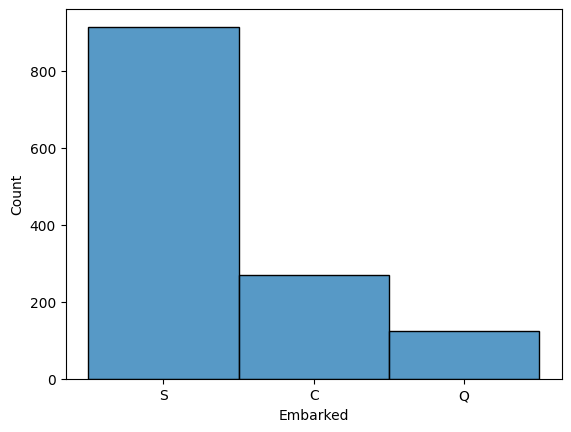

In [20]:
sns.histplot(df['Embarked']);

In [21]:
# He have just 2 null values in Embarked row, so I'm going to fill that up with S which in most common
df['Embarked'] = df['Embarked'].fillna('S')

In [22]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [23]:
df['Cabin'].value_counts()
# Too complicated, but i can visit later
'''
!!!
Visit Later
!!!
'''

'\n!!!\nVisit Later\n!!!\n'

In [24]:
del df['Cabin']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [27]:
# Parch --> Number of Parents and Children (on board)
# SibSp --> Sibling and Spouse
df['Family'] = df['Parch'] + df['SibSp']

In [28]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)


In [29]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [30]:
# Replacing those that are misspelled
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                       'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [31]:
df['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

In [32]:
df = df.drop('Name', axis = 1)

In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Family', 'Title'],
      dtype='object')

In [34]:
df['Age'].mean()

29.881137667304014

In [35]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))
# This part is from Ömer Can

In [36]:
master = df[df['Title'] == 'Master']

In [37]:
master['Age'].mean()

5.2881967213114764

In [38]:
master

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Title
7,8,0.0,3,male,2.0,3,1,349909,21.0750,S,4,Master
16,17,0.0,3,male,2.0,4,1,382652,29.1250,Q,5,Master
50,51,0.0,3,male,7.0,4,1,3101295,39.6875,S,5,Master
59,60,0.0,3,male,11.0,5,2,CA 2144,46.9000,S,7,Master
63,64,0.0,3,male,4.0,3,2,347088,27.9000,S,5,Master
...,...,...,...,...,...,...,...,...,...,...,...,...
360,1252,NaN,3,male,14.5,8,2,CA. 2343,69.5500,S,10,Master
379,1271,NaN,3,male,5.0,4,2,347077,31.3875,S,6,Master
389,1281,NaN,3,male,6.0,3,1,349909,21.0750,S,4,Master
392,1284,NaN,3,male,13.0,0,2,C.A. 2673,20.2500,S,2,Master


In [39]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Family           0
Title            0
dtype: int64

In [40]:
df.corr(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
PassengerId,1.000000,-0.005007,-0.038354,0.024480,-0.055224,0.008942,0.031416,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.072058,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.038354,-0.338481,1.000000,-0.392047,0.060832,0.018322,-0.558477,0.050027
Age,0.024480,-0.072058,-0.392047,1.000000,-0.214327,-0.129954,0.180640,-0.212004
SibSp,-0.055224,-0.035322,0.060832,-0.214327,1.000000,0.373587,0.160224,0.861952
Parch,0.008942,0.081629,0.018322,-0.129954,0.373587,1.000000,0.221522,0.792296
Fare,0.031416,0.257307,-0.558477,0.180640,0.160224,0.221522,1.000000,0.226465
Family,-0.031437,0.016639,0.050027,-0.212004,0.861952,0.792296,0.226465,1.000000


In [41]:
df = df.drop('Ticket', axis = 1)

In [42]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,1,0.0,3,male,22.0,1,0,7.2500,S,1,Mr
1,2,1.0,1,female,38.0,1,0,71.2833,C,1,Mrs
2,3,1.0,3,female,26.0,0,0,7.9250,S,0,Miss
3,4,1.0,1,female,35.0,1,0,53.1000,S,1,Mrs
4,5,0.0,3,male,35.0,0,0,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,male,29.0,0,0,8.0500,S,0,Mr
414,1306,NaN,1,female,39.0,0,0,108.9000,C,0,Rare
415,1307,NaN,3,male,38.5,0,0,7.2500,S,0,Mr
416,1308,NaN,3,male,29.0,0,0,8.0500,S,0,Mr


In [43]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Family           0
Title            0
dtype: int64

In [44]:
df = pd.get_dummies(df, drop_first = True)

In [45]:
df.info()
# With get_dummies, it turns into sth like this:

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Family       1309 non-null   int64  
 8   Sex_male     1309 non-null   bool   
 9   Embarked_Q   1309 non-null   bool   
 10  Embarked_S   1309 non-null   bool   
 11  Title_Miss   1309 non-null   bool   
 12  Title_Mr     1309 non-null   bool   
 13  Title_Mrs    1309 non-null   bool   
 14  Title_Rare   1309 non-null   bool   
dtypes: bool(7), float64(3), int64(5)
memory usage: 101.0 KB


In [46]:
x, y = df[:891].drop('Survived', axis = 1), df[:891][['Survived']]

In [47]:
x.shape

(891, 14)

In [48]:
y.shape

(891, 1)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
def result_func(model, count):
    predict_x = model.predict(df[891:].drop('Survived', axis = 1))
    predict_x = predict_x.astype(np.float64)
    result_dataset = pd.DataFrame()
    result_dataset['PassengerId'] = df[891:]['PassengerId']
    result_dataset['Predict'] = predict_x
    result_dataset['Survived'] = result_dataset['Predict'].map(lambda s:1 if s>=0.5 else 0)
    print(result_dataset['Survived'].value_counts().plot.bar())
    result_dataset.drop('Predict', axis = 1).to_csv('titanic_deep_learning_result{}.csv'.format(count), index = False)
    return result_dataset

In [51]:
model = Sequential()
model.add(Dense(14, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [52]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [53]:
model.fit(x, y, epochs = 150, batch_size = 10, verbose = 1)

Epoch 1/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5899 - loss: 3.0352
Epoch 2/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5877 - loss: 0.8372
Epoch 3/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6524 - loss: 0.6898
Epoch 4/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.6692 - loss: 0.6617
Epoch 5/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.6573 - loss: 0.7263
Epoch 6/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.6672 - loss: 0.6767
Epoch 7/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.7141 - loss: 0.5920
Epoch 8/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.6998 - loss: 0.5711
Epoch 9/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7036 - loss: 0.5767
Epoch 10/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.6973 - loss: 0.5769
Epoch 11/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.7063 - loss: 0.6018
Epoch 12/150
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 888u

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,301 (5.09 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 868 (3.39 KB)

In [55]:
scores = model.evaluate(x, y)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8105 - loss: 0.4215


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Axes(0.125,0.11;0.775x0.77)


,PassengerId,Predict,Survived
0,892,0.319848,0
1,893,0.750561,1
2,894,0.184522,0
3,895,0.349755,0
4,896,0.878879,1
...,...,...,...
413,1305,0.482677,0
414,1306,0.998451,1
415,1307,0.377535,0
416,1308,0.483896,0


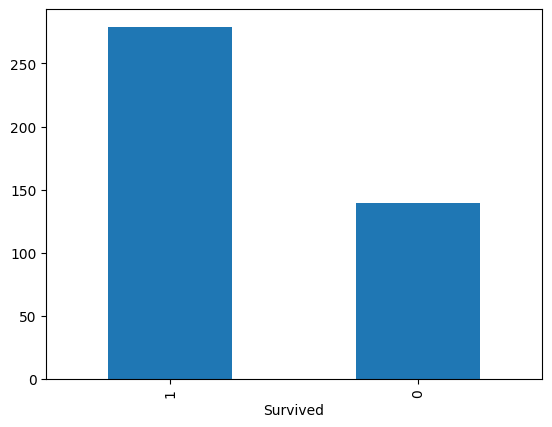

In [56]:
result_func(model, 1)